In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
from pprint import pprint
import json
from datetime import datetime 

# Pull source UI file
ui_clean = pd.read_csv("../Resources/ui_clean.csv")
ui_clean['Year'] = pd.DatetimeIndex(ui_clean['Reflecting Week Ended']).year
ui_clean.head(2)

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate,Weeknum,Year
0,California,2015-01-03,"40,784",2014-12-27,"420,154","15,245,478",2.76,52,2014
1,California,2015-01-10,"66,906",2015-01-03,"423,923","15,354,250",2.76,1,2015


In [34]:
ui_2020_parse = ui_clean[ui_clean["Year"] == 2020]
ui_2020 = ui_2020_parse.groupby(['State', 'Weeknum'])["Insured Unemployment Rate"].mean()
ui_2020 = pd.DataFrame(ui_2020)
ui_2020.to_csv("../Resources/ui_2020.csv", index=True)
ui_2020.head(2)

Insured Unemployment Rate
State      Weeknum                           
California 1                             2.06
           2                             2.18

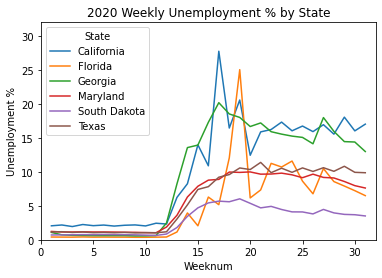

In [35]:
ui_2020.pivot_table('Insured Unemployment Rate', index='Weeknum', columns='State', aggfunc='mean').plot()
plt.axis([0, 32, 0, 32])
plt.ylabel('Unemployment %')
plt.title("2020 Weekly Unemployment % by State")
plt.savefig('../output_data/UI_AD_Scat/2020_wk_UI_allstates_linechart.png')

In [36]:
###############################

In [37]:
# Pull source ad file
ad_df = pd.read_csv("../Resources/ad_clean.csv")
ad_df = ad_df[ad_df["Indicator"] == "Symptoms of Anxiety Disorder or Depressive Disorder"]
ad_df

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
140,Symptoms of Anxiety Disorder or Depressive Dis...,National Estimate,United States,United States,1,2020-04-23,35.9,35.0,36.8,35.0 - 36.8,NaN,17
141,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,18 - 29 years,1,2020-04-23,46.8,44.3,49.3,44.3 - 49.3,NaN,17
142,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,30 - 39 years,1,2020-04-23,39.6,37.7,41.5,37.7 - 41.5,NaN,17
143,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,40 - 49 years,1,2020-04-23,38.9,37.2,40.7,37.2 - 40.7,NaN,17
144,Symptoms of Anxiety Disorder or Depressive Dis...,By Age,United States,50 - 59 years,1,2020-04-23,35.8,34.0,37.7,34.0 - 37.7,NaN,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2515,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Virginia,Virginia,12,2020-07-16,38.3,34.0,42.7,34.0 - 42.7,37.2-40.5,29
2516,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Washington,Washington,12,2020-07-16,43.8,39.3,48.5,39.3 - 48.5,43.6-50.2,29
2517,Symptoms of Anxiety Disorder or Depressive Dis...,By State,West Virginia,West Virginia,12,2020-07-16,37.0,31.4,42.8,31.4 - 42.8,31.8-37.1,29
2518,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,12,2020-07-16,33.3,28.9,37.9,28.9 - 37.9,31.8-37.1,29


In [38]:
ad_cal = ad_df[ad_df["State"] == "California"]
ad_cal.head(2)

,Indicator,Group,State,Subgroup,Week,Week Label,Value,Low CI,High CI,Confidence Interval,Quartile range,Weeknum
163,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,1,2020-04-23,37.4,34.2,40.6,34.2 - 40.6,36.8 - 41.4,17
373,Symptoms of Anxiety Disorder or Depressive Dis...,By State,California,California,2,2020-05-07,34.4,30.4,38.6,30.4 - 38.6,33.5 - 36.0,19


In [39]:
ad_cal_group = ad_cal.groupby(['State', 'Weeknum'])["Value"].mean()
ad_cal_group = pd.DataFrame(ad_cal_group)
ad_cal_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_cal_group.head(2)

Value
State      Weeknum       
California 17        37.4
           19        34.4

In [40]:
ad_fla = ad_df[ad_df["State"] == "Florida"]
ad_fla_group = ad_fla.groupby(['State', 'Weeknum'])["Value"].mean()
ad_fla_group = pd.DataFrame(ad_fla_group)
ad_fla_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_fla_group.head(2)

Value
State   Weeknum       
Florida 17        36.8
        19        33.6

In [41]:
ad_ga = ad_df[ad_df["State"] == "Georgia"]
ad_ga_group = ad_ga.groupby(['State', 'Weeknum'])["Value"].mean()
ad_ga_group = pd.DataFrame(ad_ga_group)
ad_ga_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_ga_group.head(2)

Value
State   Weeknum       
Georgia 17        36.2
        19        34.3

In [42]:
ad_md = ad_df[ad_df["State"] == "Maryland"]
ad_md_group = ad_md.groupby(['State', 'Weeknum'])["Value"].mean()
ad_md_group = pd.DataFrame(ad_md_group)
ad_md_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_md_group.head(2)

Value
State    Weeknum       
Maryland 17        32.9
         19        34.6

In [43]:
ad_sd = ad_df[ad_df["State"] == "South Dakota"]
ad_sd_group = ad_sd.groupby(['State', 'Weeknum'])["Value"].mean()
ad_sd_group = pd.DataFrame(ad_sd_group)
ad_sd_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_sd_group.head(2)

Value
State        Weeknum       
South Dakota 17        25.6
             19        29.8

In [44]:
ad_tx = ad_df[ad_df["State"] == "Texas"]
ad_tx_group = ad_tx.groupby(['State', 'Weeknum'])["Value"].mean()
ad_tx_group = pd.DataFrame(ad_tx_group)
ad_tx_group.to_csv("../Resources/ad_2020.csv", index=True)
ad_tx_group.head(2)

Value
State Weeknum       
Texas 17        34.9
      19        35.9

In [45]:
cal_fla = ad_cal_group.append(ad_fla_group)
cal_fla_ga = cal_fla.append(ad_ga_group)
cal_fla_ga_md =cal_fla_ga.append(ad_md_group)
cal_fla_ga_md_sd = cal_fla_ga_md.append(ad_sd_group)
ad_all_df = cal_fla_ga_md_sd.append(ad_tx_group)

ad_all_df = pd.DataFrame(ad_all_df)
ad_all_df.to_csv("../Resources/ad_all_df.csv", index=True)

ad_all_df.head()

Value
State      Weeknum       
California 17        37.4
           19        34.4
           20        38.8
           21        36.2
           22        38.6

In [46]:
ad_all_df = ad_all_df.rename(columns={"Value": "Anxiety"})
ui_ad_forscatter = pd.merge(ad_all_df, ui_2020, how= "outer", on = ["State", "Weeknum"])
ui_ad_forscatter = ui_ad_forscatter.reset_index()
ui_ad_forscatter

,State,Weeknum,Anxiety,Insured Unemployment Rate
0,California,17,37.4,27.75
1,California,19,34.4,20.57
2,California,20,38.8,12.44
3,California,21,36.2,15.88
4,California,22,38.6,16.23
...,...,...,...,...
181,Texas,15,NaN,7.41
182,Texas,16,NaN,7.82
183,Texas,18,NaN,9.60
184,Texas,30,NaN,9.93


In [47]:
ui_ad_scat_clean = ui_ad_forscatter.dropna(how='any')
ui_ad_scat_clean.to_csv("../Resources/ui_ad_scat_clean.csv", index=True)
ui_ad_scat_clean

,State,Weeknum,Anxiety,Insured Unemployment Rate
0,California,17,37.4,27.75
1,California,19,34.4,20.57
2,California,20,38.8,12.44
3,California,21,36.2,15.88
4,California,22,38.6,16.23
...,...,...,...,...
67,Texas,25,36.2,10.58
68,Texas,26,40.7,10.06
69,Texas,27,41.6,10.61
70,Texas,28,45.9,10.08


R Squared Val is 0.08916941867418232


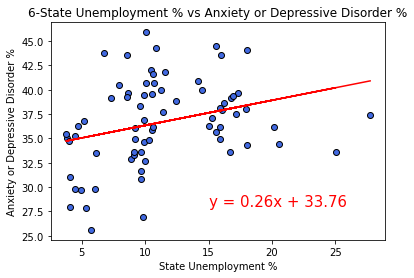

In [48]:
#plotting and formatting scatter
plt.scatter(ui_ad_scat_clean['Insured Unemployment Rate'], ui_ad_scat_clean['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("State Unemployment %")
plt.ylabel("Anxiety or Depressive Disorder %")
plt.title("6-State Unemployment % vs Anxiety or Depressive Disorder %")

#defining values
x_values = ui_ad_scat_clean['Insured Unemployment Rate']
y_values = ui_ad_scat_clean['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Squared Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(15, 28),fontsize=15,color="red") 

plt.savefig('../output_data/UI_AD_Scat/Allstates_UI_vs_AD_scat.png')

The R Value was low suggesting there was a low correlation between Unemployment % compared to Anxiety and Depression %

In [49]:
ui_scat_cal = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "California"]
ui_scat_cal.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
0,California,17,37.4,27.75
1,California,19,34.4,20.57


R Squared Val is 0.06348861620335115


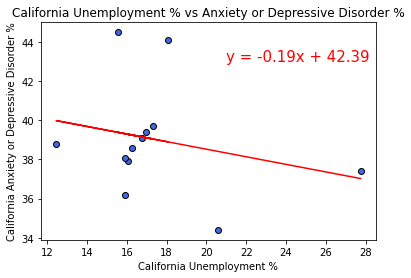

In [50]:
#plotting and formatting scatter
plt.scatter(ui_scat_cal['Insured Unemployment Rate'], ui_scat_cal['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("California Unemployment %")
plt.ylabel("California Anxiety or Depressive Disorder %")
plt.title("California Unemployment % vs Anxiety or Depressive Disorder %")

#defining values
x_values = ui_scat_cal['Insured Unemployment Rate']
y_values = ui_scat_cal['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Squared Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(21,43),fontsize=15,color="red") 
plt.savefig('../output_data/UI_AD_Scat/Cali_UI_vs_AD_scat.png')

In [51]:
ui_scat_ga = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Georgia"]
ui_scat_ga.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
24,Georgia,17,36.2,20.18
25,Georgia,19,34.3,18.01


R Squared Val is 0.1388517442028963


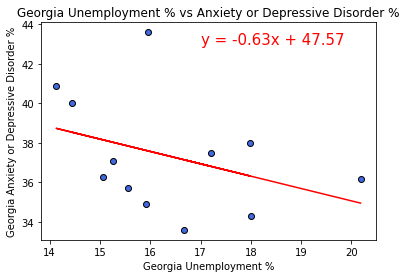

In [52]:
#plotting and formatting scatter
plt.scatter(ui_scat_ga['Insured Unemployment Rate'], ui_scat_ga['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Georgia Unemployment %")
plt.ylabel("Georgia Anxiety or Depressive Disorder %")
plt.title("Georgia Unemployment % vs Anxiety or Depressive Disorder %")

#defining values
x_values = ui_scat_ga['Insured Unemployment Rate']
y_values = ui_scat_ga['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Squared Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(17,43),fontsize=15,color="red") 
plt.savefig('../output_data/UI_AD_Scat/GA_UI_vs_AD_scat.png')

In [53]:
ui_scat_fl = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Florida"]
ui_scat_fl.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
12,Florida,17,36.8,5.17
13,Florida,19,33.6,25.04


R Squared Val is 0.12038601420623161


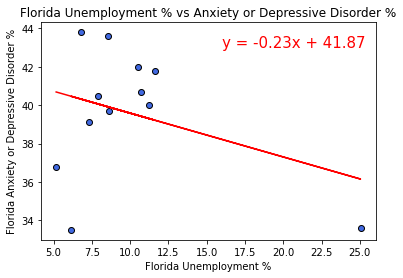

In [54]:
#plotting and formatting scatter
plt.scatter(ui_scat_fl['Insured Unemployment Rate'], ui_scat_fl['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Florida Unemployment %")
plt.ylabel("Florida Anxiety or Depressive Disorder %")
plt.title("Florida Unemployment % vs Anxiety or Depressive Disorder %")

#defining values
x_values = ui_scat_fl['Insured Unemployment Rate']
y_values = ui_scat_fl['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Squared Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(16,43),fontsize=15,color="red") 
plt.savefig('../output_data/UI_AD_Scat/FL_UI_vs_AD_scat.png')

In [55]:
ui_scat_md = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Maryland"]
ui_scat_md.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
36,Maryland,17,32.9,8.89
37,Maryland,19,34.6,9.92


R Squared Val is 0.2550161097387838


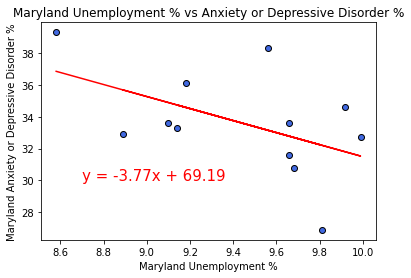

In [56]:
#plotting and formatting scatter
plt.scatter(ui_scat_md['Insured Unemployment Rate'], ui_scat_md['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Maryland Unemployment %")
plt.ylabel("Maryland Anxiety or Depressive Disorder %")
plt.title("Maryland Unemployment % vs Anxiety or Depressive Disorder %")

#defining values
x_values = ui_scat_md['Insured Unemployment Rate']
y_values = ui_scat_md['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Squared Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(8.7,30),fontsize=15,color="red") 
plt.savefig('../output_data/UI_AD_Scat/MD_UI_vs_AD_scat.png')

In [57]:
ui_scat_sd = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "South Dakota"]
ui_scat_sd.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
48,South Dakota,17,25.6,5.69
49,South Dakota,19,29.8,6.03


R Squared Val is 0.3700032239524132


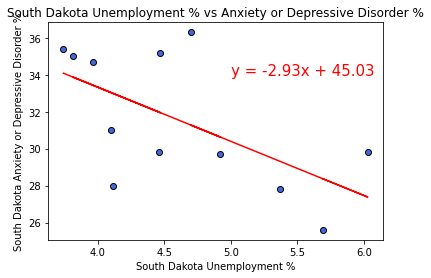

In [58]:
#plotting and formatting scatter
plt.scatter(ui_scat_sd['Insured Unemployment Rate'], ui_scat_sd['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("South Dakota Unemployment %")
plt.ylabel("South Dakota Anxiety or Depressive Disorder %")
plt.title("South Dakota Unemployment % vs Anxiety or Depressive Disorder %")

#defining values
x_values = ui_scat_sd['Insured Unemployment Rate']
y_values = ui_scat_sd['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Squared Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(5, 34),fontsize=15,color="red") 
plt.savefig('../output_data/UI_AD_Scat/SD_UI_vs_AD_scat.png')

In [59]:
ui_scat_tx = ui_ad_scat_clean[ui_ad_scat_clean["State"] == "Texas"]
ui_scat_tx.head(2)

,State,Weeknum,Anxiety,Insured Unemployment Rate
60,Texas,17,34.9,9.21
61,Texas,19,35.9,10.57


R Squared Val is 0.02893057673053143


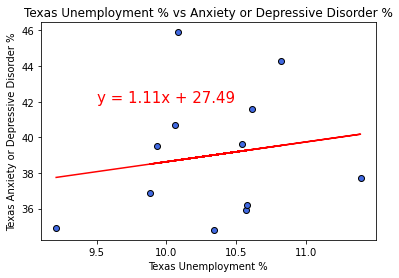

In [60]:
#plotting and formatting scatter
plt.scatter(ui_scat_tx['Insured Unemployment Rate'], ui_scat_tx['Anxiety'],marker="o", facecolors="royalblue", edgecolors="black")

#inserting chart labels
plt.xlabel("Texas Unemployment %")
plt.ylabel("Texas Anxiety or Depressive Disorder %")
plt.title("Texas Unemployment % vs Anxiety or Depressive Disorder %")

#defining values
x_values = ui_scat_tx['Insured Unemployment Rate']
y_values = ui_scat_tx['Anxiety']

#defining stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#Defining regression
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plotting line regress
plt.plot(x_values,regress_values,"r-")

#Printing R Value
print(f"R Squared Val is {rvalue**2}")

#Plotting line equation on the graph
plt.annotate(line_eq,(9.5, 42),fontsize=15,color="red") 
plt.savefig('../output_data/UI_AD_Scat/TX_UI_vs_AD_scat.png')